# HOMEWORK 5
In this homework you are going to implement the Floyd-Steinberg dithering algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this wiki page. In order to implement the dithering, we will implement the following steps:

* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error
You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [1]:
import cv2
import math
from tqdm import tqdm
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
def get_avg_quant_error(original, processed):
    orig_reshaped = original.reshape(-1, 3)
    proc_reshaped = processed.reshape(-1, 3)
    avg_quant_error = np.average((orig_reshaped - proc_reshaped)**2) ** 0.5
    return avg_quant_error

In [3]:
def get_quantized_img(img, colors):
    # Cast the image to float
    img = img.astype(np.float32)

    # Prepare for quantization
    rows, cols, channels = img.shape
    quantized = np.zeros_like(img)

    # Apply quantization
    for r in tqdm(range(rows)):
        for c in range(cols):
            # Extract the original pixel value
            pixel = img[r, c]

            # Find the closest colour from the pallette (using absolute value/Euclidean distance)
            # Note: You may need more than one line of code here
            new_pixel = colors[np.argmin([np.linalg.norm(pixel-color) for color in colors])]

            # Apply quantization
            quantized[r, c, :] = new_pixel
    return quantized

In [4]:
def get_FSD_quantized_img(img, colors):
    # Make a temporal copy of the original image, we will need it for error diffusion
    img = img.astype(np.float32)
    img_tmp = np.copy(img)
    dithering = np.zeros_like(img)
    rows, cols, channels = img.shape

    for r in tqdm(range(1, rows-1)):
        for c in range(1, cols-1):
            # Extract the original pixel value
            pixel = img_tmp[r, c]

            # Find the closest colour from the pallette (using absolute value/Euclidean distance)
            # Note: You may need more than one line of code here
            new_pixel = colors[np.argmin([np.linalg.norm(pixel-color) for color in colors])]

            # Compute quantization error
            quant_error = pixel - new_pixel

            # Diffuse the quantization error accroding to the FS diffusion matrix
            # Note: You may need more than one line of code here
            img_tmp[r + 1][c    ] += quant_error * 7 / 16
            img_tmp[r - 1][c + 1] += quant_error * 3 / 16
            img_tmp[r    ][c + 1] += quant_error * 5 / 16
            img_tmp[r + 1][c + 1] += quant_error * 1 / 16

            # Apply dithering
            dithering[r, c, :] = new_pixel
    return dithering

Let's load the image.

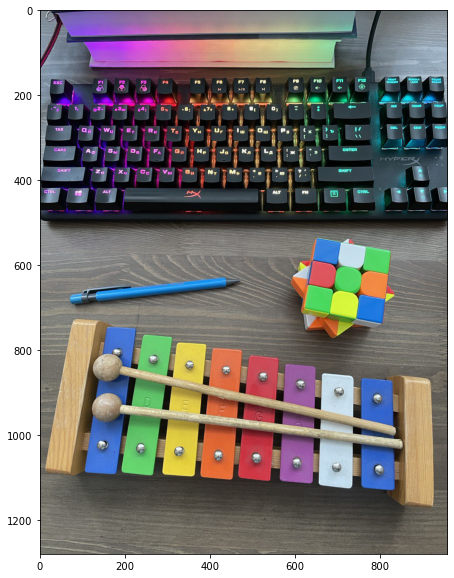

In [5]:
# Load image
img = cv2.imread('../data/source5.jpg')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

Let's start with gray tones first.

In [6]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [7]:
quantized = get_quantized_img(img, colors)

# Compute average quantization error
get_avg_quant_error(img, quantized)

100%|██████████| 1280/1280 [01:05<00:00, 19.48it/s]


45.149069498301955

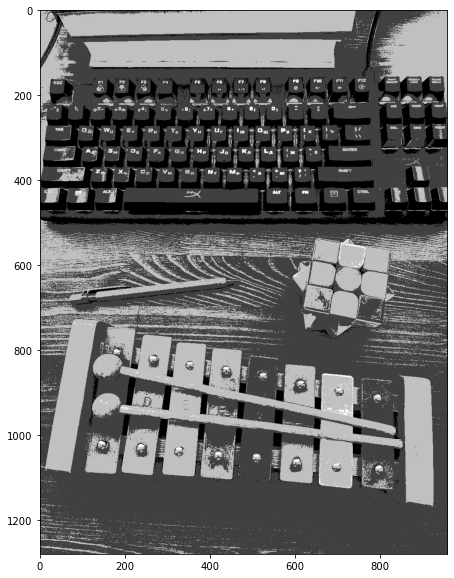

In [8]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))

# Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [9]:
dithering = get_FSD_quantized_img(img, colors)

# Compute average quantization error for dithered image
get_avg_quant_error(img, dithering)

100%|██████████| 1278/1278 [01:15<00:00, 16.84it/s]


53.584504031162076

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x294e0f22280>)

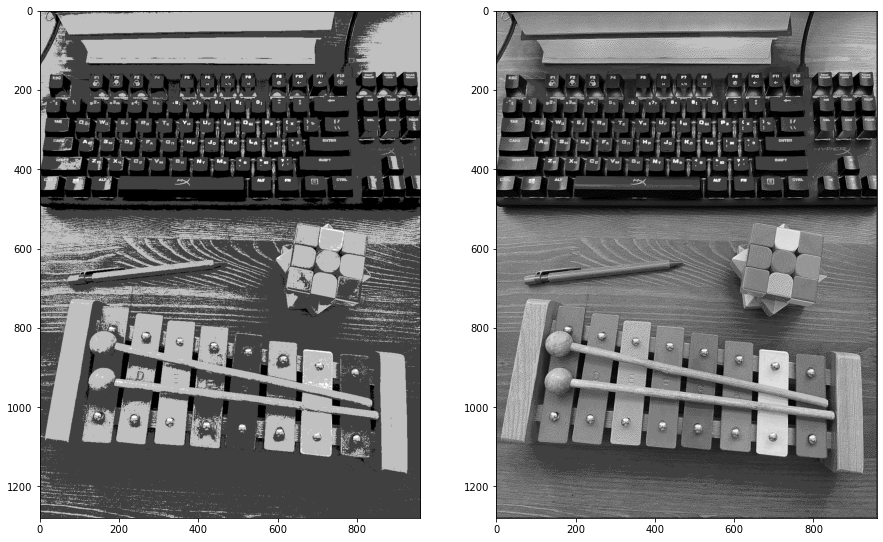

In [10]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

# Questions
 * Which image has higher quantization error? Optimally quantized or dithered?
 
dithered, это очевидно, потому что реализация алгоритма подразумевает, что мы специально своими руками увеличиваем ошибку соседних пикселей ради визуальной красоты ;) а это собственно увеличивает общую ошибку квантования
 
* Which image looks better to you?

dithered image выглядит заметно лучше, как раз этого мы и добивались алгоритмом FSD :)

* Can you repeat the same process using only two colours: black and white? Show me :-)

In [11]:
# Black, white
colors2 = np.array([[0, 0, 0],
                   [255, 255, 255]])

In [12]:
quantized2 = get_quantized_img(img, colors2)

# Compute average quantization error
get_avg_quant_error(img, quantized2)

100%|██████████| 1280/1280 [00:30<00:00, 42.00it/s]


93.53882987996215

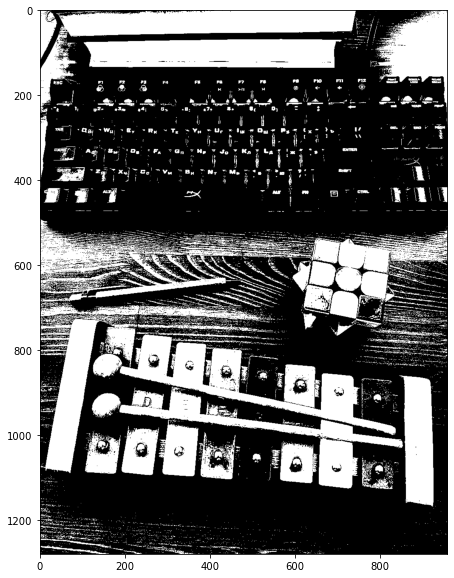

In [13]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized2.astype(np.uint8))

In [14]:
dithering2 = get_FSD_quantized_img(img, colors2)

# Compute average quantization error for dithered image
get_avg_quant_error(img, dithering2)

100%|██████████| 1278/1278 [00:57<00:00, 22.20it/s]


114.03193939912185

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x294e104f670>)

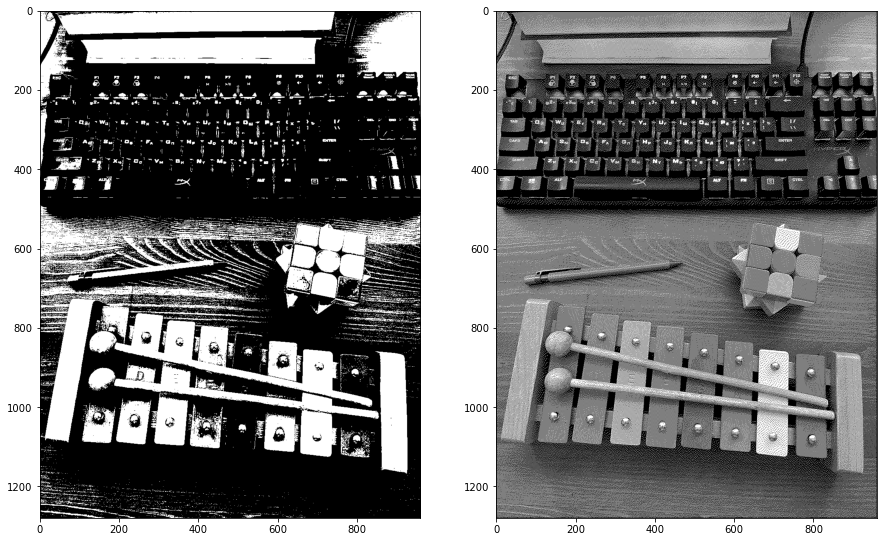

In [15]:
# Show quantized images (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized2.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering2.astype(np.uint8))   # dithering

Я очень удивлен, что 2-x цветное изображение, обработанное FSD, получилось настолько читаемым и визуально приятным! Я даже 
долго думал, что это ошибка, выглядит как будто цветов больше, чем надо, но потом додумался сделать zoom-in :)

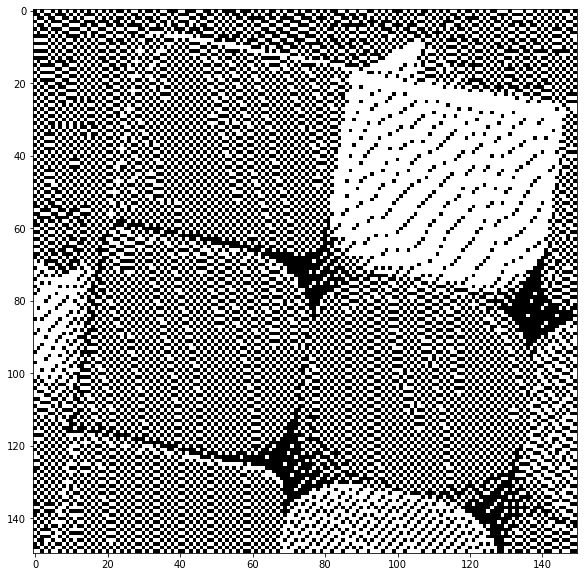

In [16]:
plt.imshow(dithering2[530:680, 620:770].astype(np.uint8))

# Bonus Points
Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16 optimal colours for your original image.

In [17]:
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 3)))
colors3 = kmeans.cluster_centers_

In [18]:
quantized3 = get_quantized_img(img, colors3)

# Compute average quantization error
get_avg_quant_error(img, quantized3)

100%|██████████| 1280/1280 [01:56<00:00, 10.98it/s]


14.911055775852558

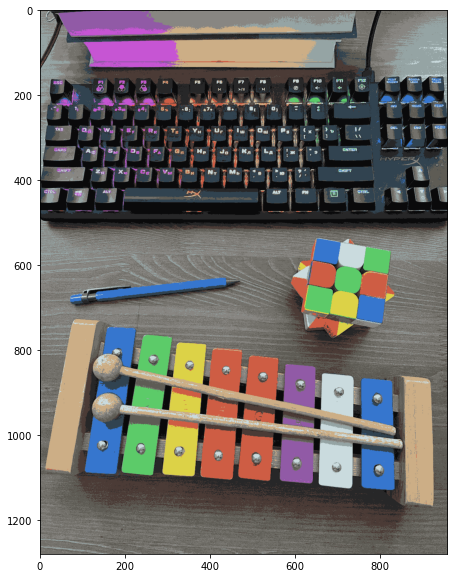

In [19]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized3.astype(np.uint8))

In [20]:
dithering3 = get_FSD_quantized_img(img, colors3)

# Compute average quantization error for dithered image
get_avg_quant_error(img, dithering3)

100%|██████████| 1278/1278 [02:21<00:00,  9.06it/s]


21.191450532787833

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x294e2178e50>)

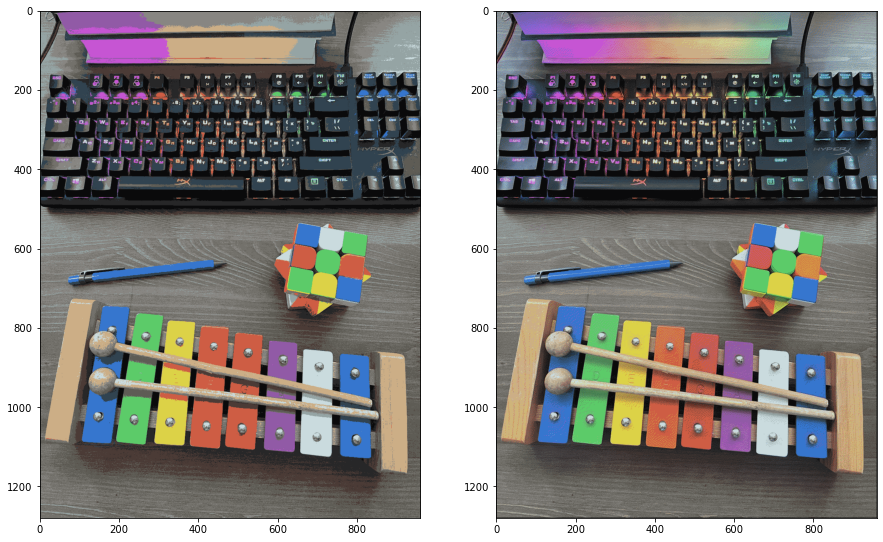

In [21]:
# Show quantized images (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized3.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering3.astype(np.uint8))   # dithering

# Questions
* How does the result look like to you?

Результат выглядит здорово! Особенно учитывая что мы используем всего 16 цветов, казалось бы :) 

* What happens if we use 32 colours?

Результат визуально будет еще лучше. И математически точнее.

* And what happens if we use 256 colours?

Изображение как математически так и визуально будет еще ближе к оригиналу! Но заметить значительные изменения будет все сложнее, потому что с увеличением количества самых часто используемых цветов изменения будут все меньше.

**Я впечатлен, крутая домашка, очень понравилась!**